In [45]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,GlobalMaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils.data_utils import get_file

import os
import random
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

In [2]:
try:
    GPUlist = tf.config.list_physical_devices('GPU')
    print(GPUlist)
    for i in GPUlist:
        tf.config.experimental.set_memory_growth(i, True)
except:
    pass

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
filename = os.listdir("./train/")
categories = []
for name in filename:
    category = name.split(".")[0]
    if(category=='cat'):
        categories.append(0)
    else:
        categories.append(1)

data = pd.DataFrame({
    'filename':filename,
    'category':categories
})
        
print(data.head()) 

        filename  category
0   dog.8011.jpg         1
1   cat.5077.jpg         0
2   dog.7322.jpg         1
3   cat.2718.jpg         0
4  cat.10151.jpg         0


In [26]:
model = InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)
weight =  weights_path = get_file(
                'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
                'https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
                cache_subdir='models',
                md5_hash='bcbd6486424b2319ff4ef7d526e38f63')
model.load_weights(weights_path)

for layer in model.layers:
    layer.trainable=False

last_layer = model.get_layer('mixed7')
last_output = last_layer.output
x = GlobalMaxPooling2D()(last_output)
x = Dense(1024,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1,activation='sigmoid')(x) 

model = Model(model.input,x)
model.compile(optimizer = RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 74, 74, 32)   864         ['input_5[0][0]']                
                                                                                                  
 batch_normalization_379 (Batch  (None, 74, 74, 32)  96          ['conv2d_376[0][0]']             
 Normalization)                                                                                   
                                                                                            

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_389 (Batch  (None, 16, 16, 96)  288         ['conv2d_386[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_390 (Batch  (None, 16, 16, 32)  96          ['conv2d_387[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_381 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_384[0][0]']
                                                                                                  
 activatio

 activation_398 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_401[0][0]']
                                                                                                  
 conv2d_396 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_399 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_398[0][0]']         
                                                                                                  
 batch_normalization_399 (Batch  (None, 16, 16, 48)  144         ['conv2d_396[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_402 (Batch  (None, 16, 16, 96)  288         ['conv2d_399[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_402[0][0]',         
                                                                  'activation_405[0][0]',         
                                                                  'max_pooling2d_18[0][0]']       
                                                                                                  
 conv2d_410 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_413 (Batch  (None, 7, 7, 128)   384         ['conv2d_410[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_410 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_413[0][0]']
          

                                                                                                  
 batch_normalization_423 (Batch  (None, 7, 7, 160)   480         ['conv2d_420[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_420 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_423[0][0]']
                                                                                                  
 conv2d_421 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_420[0][0]']         
                                                                                                  
 batch_normalization_424 (Batch  (None, 7, 7, 160)   480         ['conv2d_421[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_431 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_430[0][0]']         
                                                                                                  
 batch_normalization_434 (Batch  (None, 7, 7, 160)   480         ['conv2d_431[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_431 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_434[0][0]']
                                                                                                  
 conv2d_427 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_43

                                                                                                  
 activation_441 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_444[0][0]']
                                                                                                  
 conv2d_437 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_442 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_441[0][0]']         
                                                                                                  
 batch_normalization_440 (Batch  (None, 7, 7, 192)   576         ['conv2d_437[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

/Users/sauraku/mambaforge/envs/mc/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
data['category'] = data['category'].replace({0:'cat',1:'dog'})
train_data,val_data = train_test_split(data,test_size=0.1,random_state=1)
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_dataframe(train_data,
                                                    directory= "./train/",
                                                    class_mode='binary',
                                                    target_size=(150,150),
                                                    x_col="filename",
                                                    y_col="category",
                                                    batch_size=32)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(val_data,
                                                directory= "./train/",
                                                class_mode='binary',
                                                target_size=(150,150),
                                                x_col="filename",
                                                y_col="category",
                                                batch_size=32)

Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [29]:
earlystop = EarlyStopping(monitor='val_loss',patience=4,verbose=1)
learning_reduce = ReduceLROnPlateau(patience=2,monitor="val_acc",verbose=1,min_lr=0.00001,factor=0.5)
callbacks = [earlystop,learning_reduce]

In [30]:
history = model.fit(train_generator,
    validation_data = val_generator,
    steps_per_epoch = len(train_data)//32,
    validation_steps = len(val_data)//32,
    epochs=10,
    callbacks=callbacks)

Epoch 1/10
703/703 [==============================] - 81s 111ms/step - loss: 0.2250 - acc: 0.9107 - val_loss: 0.1086 - val_acc: 0.9563 - lr: 0.0010
Epoch 2/10
703/703 [==============================] - 77s 110ms/step - loss: 0.1767 - acc: 0.9275 - val_loss: 0.1158 - val_acc: 0.9571 - lr: 0.0010
Epoch 3/10
703/703 [==============================] - 77s 109ms/step - loss: 0.1663 - acc: 0.9316 - val_loss: 0.1012 - val_acc: 0.9639 - lr: 0.0010
Epoch 4/10
703/703 [==============================] - 77s 109ms/step - loss: 0.1634 - acc: 0.9312 - val_loss: 0.1057 - val_acc: 0.9567 - lr: 0.0010
Epoch 5/10
703/703 [==============================] - ETA: 0s - loss: 0.1591 - acc: 0.9344
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
703/703 [==============================] - 77s 109ms/step - loss: 0.1591 - acc: 0.9344 - val_loss: 0.1093 - val_acc: 0.9539 - lr: 0.0010
Epoch 6/10
703/703 [==============================] - 77s 109ms/step - loss: 0.1563 - acc: 0.9368 - val_

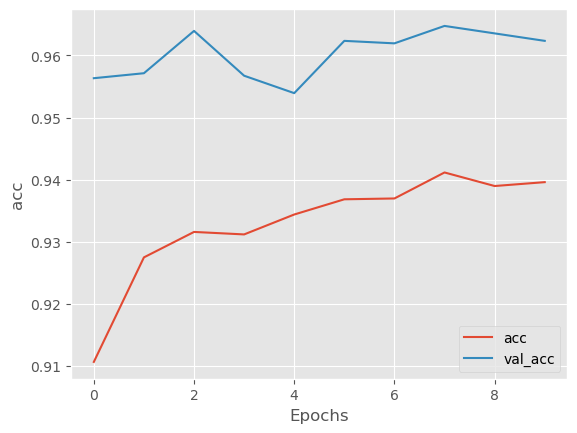

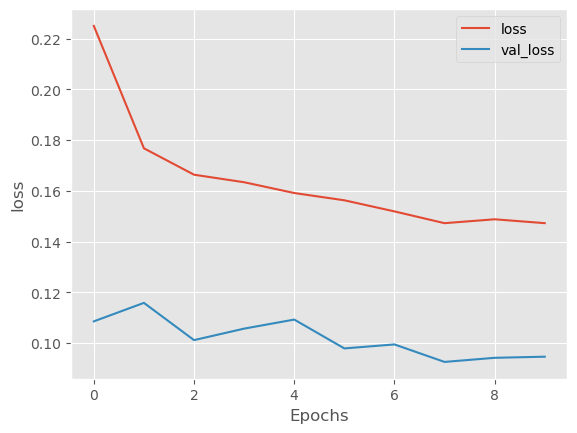

In [31]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,"val_"+string])
    plt.show()
plot_graphs(history,'acc')
plot_graphs(history,'loss')

In [32]:
model.save_weights('binary_classifier.h5')

In [68]:
test_filename=os.listdir("./test1/")
test_data = pd.DataFrame({'filename': test_filename})
print(test_data.size)

12500


In [77]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(test_data,
                                                directory= "./test1/",
                                                class_mode=None,
                                                shuffle = False,
                                                target_size=(128,128),
                                                x_col="filename",
                                                y_col=None,
                                                batch_size=32)

Found 12500 validated image filenames.


In [78]:
predict= model.predict_generator(test_generator,steps=np.ceil(len(test_data)/32),verbose=1)
test_data['id'] = [i.split('.')[0] for i in test_data['filename']]
test_data['label'] = np.where(predict>0.5,1,0)

<ipython-input-78-f79e5d2d7b60>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict= model.predict_generator(test_generator,steps=np.ceil(len(test_data)/32),verbose=1)


391/391 [==============================] - 16s 42ms/step


In [75]:
print(predict)
print(test_data.head(10))

[[1.1794579e-03]
 [2.6628515e-04]
 [1.9758255e-03]
 ...
 [9.9856848e-01]
 [9.9194217e-01]
 [9.0053308e-01]]
    filename     id  label
0   9733.jpg   9733      0
1     63.jpg     63      0
2   6400.jpg   6400      0
3    823.jpg    823      1
4   4217.jpg   4217      1
5   3578.jpg   3578      0
6  10321.jpg  10321      0
7   2666.jpg   2666      0
8   5109.jpg   5109      1
9  11981.jpg  11981      1


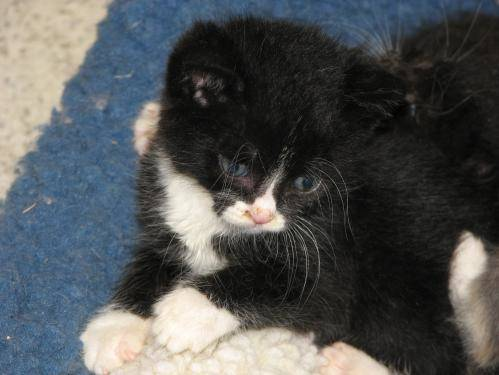

0
****************************************************


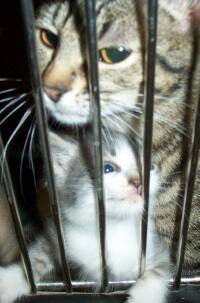

0
****************************************************


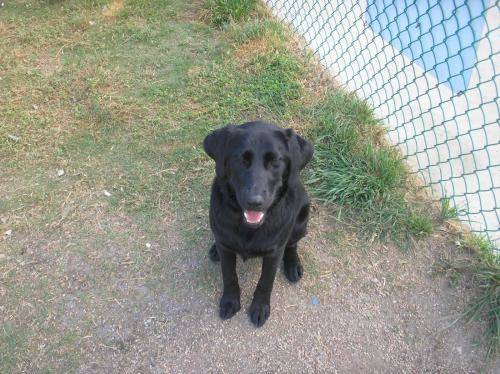

1
****************************************************


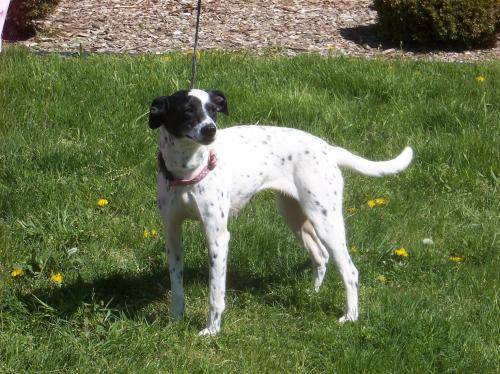

1
****************************************************


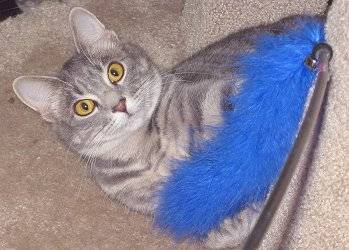

0
****************************************************


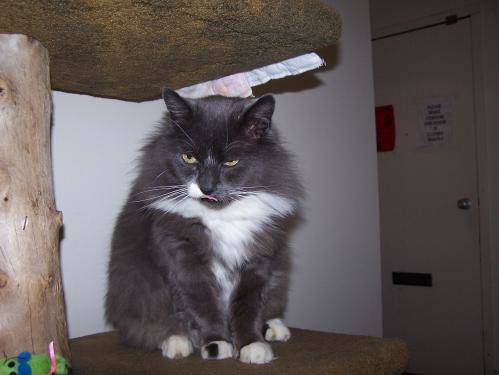

0
****************************************************


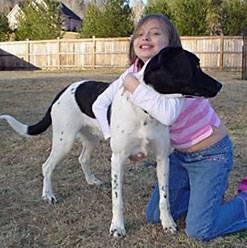

1
****************************************************


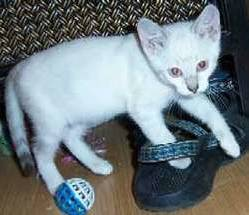

0
****************************************************


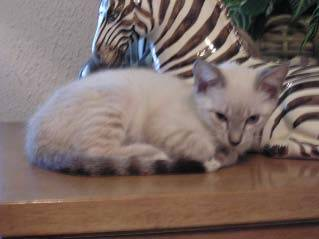

0
****************************************************


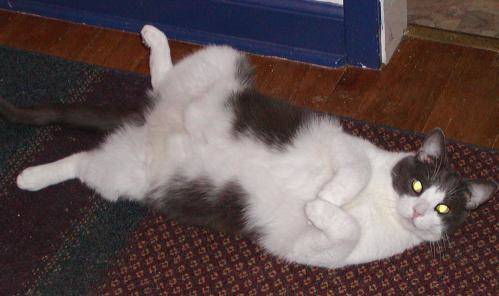

0
****************************************************


In [79]:
for idx,row  in test_data.head(10).iterrows():
    display(Image(filename="./test1/" + row['filename']))
    print(row['label'])
    print("****************************************************")

In [81]:
header = ["id", "label"]
test_data.to_csv('results.csv', columns = header, sep=',')